2. Um analista do mercado acionário coletou os retornos mensais de duas ações que pretende indicar aos seus clientes. Calcule as estatísticas descritivas para as duas variáveis, incluindo o coeficiente de correlação entre os retornos.





In [45]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('exercicio-2.xlsx')

In [10]:
df

,Meses,Ação 1,Ação 2
0,1,-0.0212,0.2645
1,2,0.2438,0.2086
2,3,0.2296,0.1248
3,4,-0.2018,0.0209
4,5,0.1296,0.2055
5,6,0.0615,0.6260
6,7,-0.1591,-0.1490
7,8,-0.1001,0.2580
8,9,-0.0265,0.1722
9,10,0.0776,0.0199


In [11]:
descritivas = df.describe()

In [12]:
descritivas

,Meses,Ação 1,Ação 2
count,23.00000,23.000000,23.000000
mean,12.00000,0.035204,0.151135
std,6.78233,0.129221,0.203822
min,1.00000,-0.201800,-0.149000
25%,6.50000,-0.061200,0.020400
50%,12.00000,0.037000,0.124800
75%,17.50000,0.116050,0.233300
max,23.00000,0.281400,0.626000


In [13]:
correlacao = df['Ação 1'].corr(df['Ação 2'])
print(f'Coeficiente de Correlação entre Ação 1 e Ação 2: {correlacao:.4f}')

Coeficiente de Correlação entre Ação 1 e Ação 2: 0.2908


In [14]:
# Estatísticas descritivas
descritivas_acao1 = df['Ação 1'].describe()
descritivas_acao2 = df['Ação 2'].describe()

In [15]:
# Número de observações
n_observacoes = len(df)

In [18]:
# Moda
moda_acao1 = df['Ação 1'].mode().iloc[0]
moda_acao2 = df['Ação 2'].mode().iloc[0]

In [19]:
# Quartis
quartis_acao1 = df['Ação 1'].quantile([0.25, 0.75])
quartis_acao2 = df['Ação 2'].quantile([0.25, 0.75])

In [20]:
# Decis e Percentis
decis_percentis_acao1 = df['Ação 1'].quantile([0.8, 0.9, 0.27, 0.64])
decis_percentis_acao2 = df['Ação 2'].quantile([0.8, 0.9, 0.27, 0.64])

In [21]:
# Amplitude
amplitude_acao1 = df['Ação 1'].max() - df['Ação 1'].min()
amplitude_acao2 = df['Ação 2'].max() - df['Ação 2'].min()

In [22]:
# Variância
variancia_acao1 = df['Ação 1'].var()
variancia_acao2 = df['Ação 2'].var()

In [23]:
# Desvio Padrão
desvio_padrao_acao1 = df['Ação 1'].std()
desvio_padrao_acao2 = df['Ação 2'].std()

In [24]:
# Erro Padrão
erro_padrao_acao1 = desvio_padrao_acao1 / (n_observacoes ** 0.5)
erro_padrao_acao2 = desvio_padrao_acao2 / (n_observacoes ** 0.5)

In [25]:
# Coeficiente de Variação
coeficiente_variacao_acao1 = (desvio_padrao_acao1 / df['Ação 1'].mean()) * 100
coeficiente_variacao_acao2 = (desvio_padrao_acao2 / df['Ação 2'].mean()) * 100

In [35]:
# Coeficiente de Correlação de Pearson
correlacao_acao1_acao2 = df['Ação 1'].corr(df['Ação 2'])

# Estatística T para a Correlação
estatistica_t_correlacao = (correlacao_acao1_acao2 * (n_observacoes - 2)**0.5) / ((1 - correlacao_acao1_acao2**2)**0.5)

# P-valor (bicaudal) para a Correlação
p_valor_correlacao = 2 * (1 - stats.t.cdf(abs(estatistica_t_correlacao), n_observacoes - 2))

# Valor crítico para um p-valor de 5% (bicaudal)
valor_critico_5_percent = stats.t.ppf(1 - 0.05 / 2, n_observacoes - 2)

In [36]:
print(f"Coeficiente de Correlação entre Ação 1 e Ação 2: {correlacao_acao1_acao2:.4f}")
print(f"Estatística T para a Correlação: {estatistica_t_correlacao:.4f}")
print(f"P-valor (bicaudal) para a Correlação: {p_valor_correlacao:.4f}")
print(f"Valor Crítico (5%): {valor_critico_5_percent:.4f}")

Coeficiente de Correlação entre Ação 1 e Ação 2: 0.2908
Estatística T para a Correlação: 1.3929
P-valor (bicaudal) para a Correlação: 0.1782
Valor Crítico (5%): 2.0796


In [43]:
# Organize as estatísticas na ordem desejada
estatisticas_ordenadas = [
    'Nº Observações', 'Média', 'Mediana', 'Moda', '1º Quartil', '3º Quartil', '8º Decil', '9º Decil',
    '27º Percentil', '64º Percentil', 'Valor Mínimo', 'Valor Máximo', 'Amplitude', 'Variância',
    'Desvio Padrão', 'Erro Padrão', 'Coeficiente de Variação',
    'Correlação', 'Estatística T Correlação', 'p-valor (bicaudal)', 'Valor Crítico (5%)'
]

# Crie um DataFrame com as estatísticas na ordem desejada
estatisticas_formatadas = pd.DataFrame({
    'Estatísticas': estatisticas_ordenadas,
    'Ação 1': [
        len(df), df['Ação 1'].mean(), df['Ação 1'].median(), moda_acao1, quartis_acao1[0.25], quartis_acao1[0.75],
        decis_percentis_acao1[0.8], decis_percentis_acao1[0.9], decis_percentis_acao1[0.27], decis_percentis_acao1[0.64],
        df['Ação 1'].min(), df['Ação 1'].max(), amplitude_acao1, variancia_acao1, desvio_padrao_acao1, erro_padrao_acao1,
        coeficiente_variacao_acao1, correlacao_acao1_acao2, estatistica_t_correlacao, p_valor_correlacao, valor_critico_5_percent],
    'Ação 2': [
        len(df), df['Ação 2'].mean(), df['Ação 2'].median(), moda_acao2, quartis_acao2[0.25], quartis_acao2[0.75],
        decis_percentis_acao2[0.8], decis_percentis_acao2[0.9], decis_percentis_acao2[0.27], decis_percentis_acao2[0.64],
        df['Ação 2'].min(), df['Ação 2'].max(), amplitude_acao2, variancia_acao2, desvio_padrao_acao2, erro_padrao_acao2,
        coeficiente_variacao_acao2, None, None, None, None]
})

# Exiba o DataFrame formatado
estatisticas_formatadas


,Estatísticas,Ação 1,Ação 2
0,Nº Observações,23.000000,23.000000
1,Média,0.035204,0.151135
2,Mediana,0.037000,0.124800
3,Moda,-0.201800,-0.149000
4,1º Quartil,-0.061200,0.020400
5,3º Quartil,0.116050,0.233300
6,8º Decil,0.125960,0.261900
7,9º Decil,0.223500,0.427960
8,27º Percentil,-0.056360,0.020840
9,64º Percentil,0.076312,0.182500


Um p-valor menor que 0,05 geralmente é considerado um indicativo de que a correlação é estatisticamente significativa. No contexto do coeficiente de correlação de Pearson, o p-valor é usado para testar a hipótese nula de que não há correlação entre as duas variáveis (a hipótese nula é H0: não há correlação, r = 0).

Se o p-valor for menor que 0,05 (ou qualquer nível de significância pré-determinado), você rejeita a hipótese nula e conclui que há uma correlação significativa entre as variáveis.

Um p-valor de 0.178221 sugere que a correlação observada nas suas variáveis (Ação 1 e Ação 2) não é estatisticamente diferente de zero, com base no nível de significância de 0,05.

Portanto, a hipótese nula de que não há correlação (ou seja, r=0) não é rejeitada a um nível de significância de 0,05.

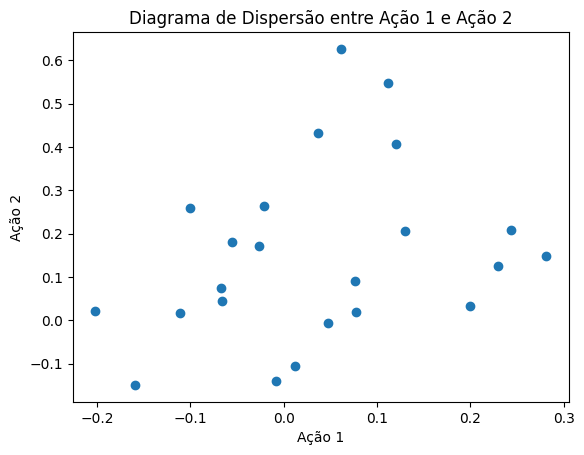

In [46]:
# Crie o diagrama de dispersão
plt.scatter(df['Ação 1'], df['Ação 2'])

# Adicione rótulos aos eixos
plt.xlabel('Ação 1')
plt.ylabel('Ação 2')

# Adicione um título ao gráfico
plt.title('Diagrama de Dispersão entre Ação 1 e Ação 2')

# Exiba o gráfico
plt.show()

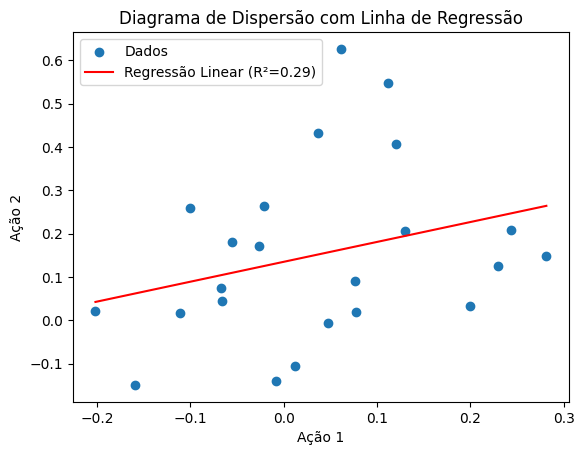

In [47]:
# Crie o diagrama de dispersão
plt.scatter(df['Ação 1'], df['Ação 2'], label='Dados')

# Calcule a linha de regressão linear
slope, intercept = np.polyfit(df['Ação 1'], df['Ação 2'], 1)

# Crie os valores previstos usando a linha de regressão
x = np.array([df['Ação 1'].min(), df['Ação 1'].max()])
y = slope * x + intercept

# Plote a linha de regressão
plt.plot(x, y, color='red', label=f'Regressão Linear (R²={correlacao_acao1_acao2:.2f})')

# Adicione rótulos aos eixos
plt.xlabel('Ação 1')
plt.ylabel('Ação 2')

# Adicione um título ao gráfico
plt.title('Diagrama de Dispersão com Linha de Regressão')

# Adicione uma legenda
plt.legend()

# Exiba o gráfico
plt.show()


In [48]:
# Calcula o ângulo da inclinação em radianos
angulo_radianos = np.arctan(slope)

# Converte o ângulo de radianos para graus
angulo_graus = np.degrees(angulo_radianos)

# Exibe o ângulo da inclinação em graus
print(f'Ângulo da Inclinação (em graus): {angulo_graus:.2f}')

Ângulo da Inclinação (em graus): 24.64


Em um contexto de análise de dados e gráficos de dispersão, o grau máximo que o ângulo de inclinação pode assumir é de 90 graus. Isso significa que a linha de regressão é perpendicular ao eixo horizontal (x) e inclina-se verticalmente. Quando o ângulo é de 90 graus, isso indica que as duas variáveis estão negativamente correlacionadas, o que significa que, à medida que o valor de uma variável aumenta, o valor da outra tende a diminuir.

Portanto, em um diagrama de dispersão, o ângulo de inclinação varia de 0 a 90 graus, com 0 graus representando uma correlação positiva perfeita (quando a linha de regressão é paralela ao eixo x) e 90 graus representando uma correlação negativa perfeita (quando a linha de regressão é perpendicular ao eixo x).